In [1]:
import os 

import numpy as np
import matplotlib.pylab as plt
import pandas as pd 
from tensorflow.python.summary.summary_iterator import summary_iterator
from tensorflow.python.framework import tensor_util


2022-11-12 11:15:32.728366: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/mxsmith/.conda/envs/model38/lib
2022-11-12 11:15:32.728393: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
def convert_tb_data(root_dir, sort_by=None):
    """Convert local TensorBoard data into Pandas DataFrame.
    
    Function takes the root directory path and recursively parses
    all events data.    
    If the `sort_by` value is provided then it will use that column
    to sort values; typically `wall_time` or `step`.
    
    *Note* that the whole data is converted into a DataFrame.
    Depending on the data size this might take a while. If it takes
    too long then narrow it to some sub-directories.
    
    Paramters:
        root_dir: (str) path to root dir with tensorboard data.
        sort_by: (optional str) column name to sort by.
    
    Returns:
        pandas.DataFrame with [wall_time, name, step, value] columns.
    
    """
    def convert_tfevent(filepath):
        return pd.DataFrame([
            parse_tfevent(e) for e in summary_iterator(filepath) if len(e.summary.value)
        ])

    def parse_tfevent(tfevent):
        return dict(
            wall_time=tfevent.wall_time,
            name=tfevent.summary.value[0].tag,
            step=tfevent.step,
            value=tensor_util.MakeNdarray(tfevent.summary.value[0].tensor),
        )

    columns_order = ["wall_time", "name", "step", "value"]
    
    out = []
    for (root, _, filenames) in os.walk(root_dir):
        for filename in filenames:
            if "events.out.tfevents" not in filename:
                continue
            file_full_path = os.path.join(root, filename)
            out.append(convert_tfevent(file_full_path))

    # Concatenate (and sort) all partial individual dataframes
    all_df = pd.concat(out)[columns_order]
    if sort_by is not None:
        all_df = all_df.sort_values(sort_by)
        
    df = all_df.reset_index(drop=True)

    df = pd.pivot(df, index="step", columns="name", values=["value", "wall_time"]).reset_index()
    # Wall-time is copied 
    wall_time = df[("wall_time", df["wall_time"].columns[0])]
    del df["wall_time"]
    df[("step", "step")] = df["step"]
    del df[("step", "")]
    df[("wall_time", "wall_time")] = wall_time
    df.columns = df.columns.get_level_values(1)
    return df

In [3]:
PATH = "/scratch/wellman_root/wellman1/mxsmith/results/marl/gathering/impala"

# learner_df = convert_tb_data(f"{PATH}/learner")
# train_arena_df = convert_tb_data(f"{PATH}/train_arena_0")
# eval_arena_df = convert_tb_data(f"{PATH}/eval_arena_0")

Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`


Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`


KeyError: "None of [Index(['wall_time', 'name', 'step', 'value'], dtype='object')] are in the [columns]"

Text(0.5, 0, 'Walltime')

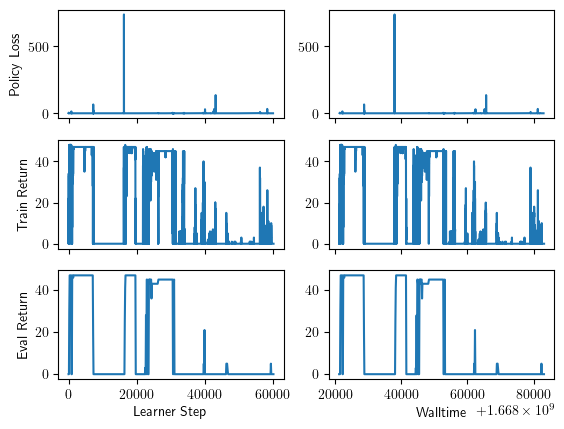

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=2, sharex="col")

axes[0, 0].plot(learner_df["learner_steps"], learner_df["loss"])
axes[1, 0].plot(train_arena_df["learner_steps"], train_arena_df["train_return_per_episode/0"])
axes[2, 0].plot(eval_arena_df["learner_steps"], eval_arena_df["eval_return/0"])

axes[0, 1].plot(learner_df["wall_time"], learner_df["loss"])
axes[1, 1].plot(train_arena_df["wall_time"], train_arena_df["train_return_per_episode/0"])
axes[2, 1].plot(eval_arena_df["wall_time"], eval_arena_df["eval_return/0"])

axes[0, 0].set_ylabel("Policy Loss")
axes[1, 0].set_ylabel("Train Return")
axes[2, 0].set_ylabel("Eval Return")

axes[-1, 0].set_xlabel("Learner Step")
axes[-1, 1].set_xlabel("Walltime")

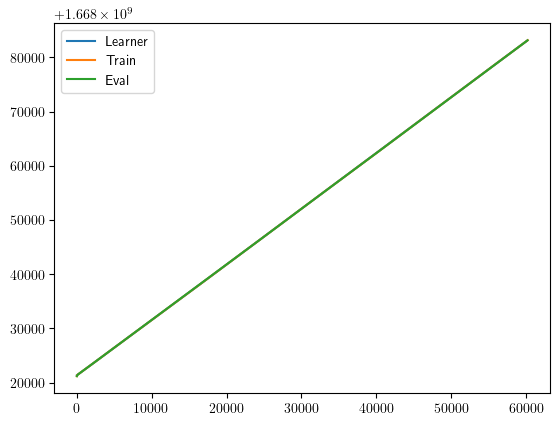

In [ ]:
fig, axes = plt.subplots()

axes.plot(learner_df["learner_steps"], learner_df["wall_time"], label="Learner")
axes.plot(train_arena_df["learner_steps"], train_arena_df["wall_time"], label="Train")
axes.plot(eval_arena_df["learner_steps"], eval_arena_df["wall_time"], label="Eval")

axes.legend()

name,actions_per_second,episode_length,episodes_per_second,learner_steps,steps_per_second,train_return_per_episode/0,train_return_per_episode/1,transitions_per_second,updates_per_second,step,wall_time
0,17518.945,100.0,20.160675,0.0,15878.453,1.0,0.0,173144.25,24.144028,0,1668021190.89585
1,121288.68,100.0,39.045483,0.0,70155.484,6.0,0.0,169784.67,8709.706,1,1668021190.996239
2,124426.83,100.0,56.818165,0.0,71848.77,0.0,0.0,173566.98,9349.416,2,1668021191.093881
3,125046.33,100.0,73.55167,0.0,71539.75,1.0,0.0,170644.67,9303.104,3,1668021191.191794
4,124240.086,100.0,89.327675,0.0,71346.664,0.0,0.0,171248.5,9165.54,4,1668021191.29025
...,...,...,...,...,...,...,...,...,...,...,...
644197,123222.95,100.0,640.2186,60236.0,71571.086,0.0,0.0,174439.23,6974.62,644197,1668083185.100279
644198,124198.4,100.0,640.205,60236.0,71912.42,0.0,0.0,174405.38,7850.092,644198,1668083185.199167
644199,124264.016,100.0,640.4018,60236.0,72080.7,0.0,0.0,175260.45,8619.909,644199,1668083185.297054
644200,123845.734,100.0,640.4468,60236.0,71743.086,0.0,0.0,174162.77,8551.659,644200,1668083185.395292


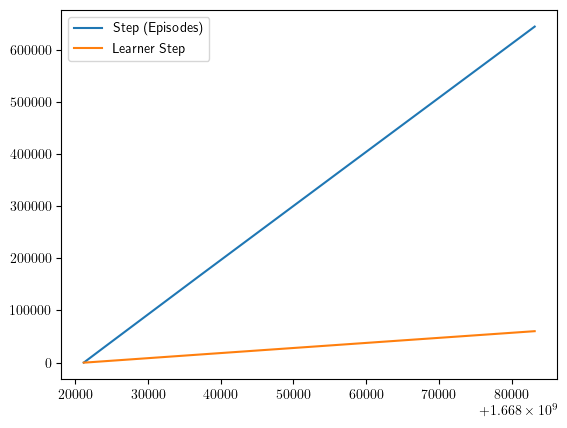

In [ ]:
display(train_arena_df)

fig, axes = plt.subplots()

axes.plot(train_arena_df["wall_time"], train_arena_df["step"], label="Step (Episodes)")
axes.plot(train_arena_df["wall_time"], train_arena_df["learner_steps"], label="Learner Step")

plt.legend()
plt.show()

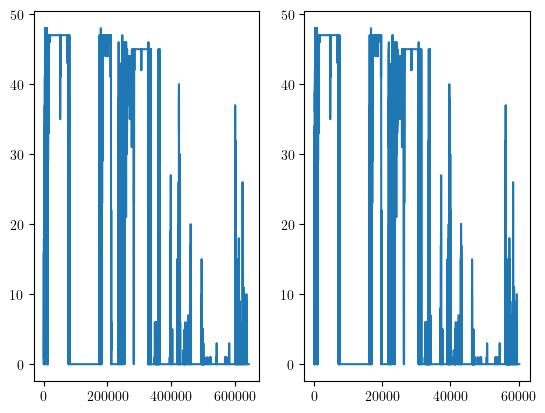

In [ ]:
fig, axes = plt.subplots(ncols=2)

axes[0].plot(train_arena_df["step"], train_arena_df["train_return_per_episode/0"])

axes[1].plot(train_arena_df["learner_steps"], train_arena_df["train_return_per_episode/0"])

plt.show()

In [ ]:
learner_df.columns

Index(['batch_size', 'critic_loss', 'entropy_loss', 'learner_frames',
       'learner_steps', 'loss', 'param_norm', 'param_updates_norm', 'policy',
       'policy_loss', 'replay/priority', 'replay/probability',
       'replay/table_size', 'replay/times_sampled', 'scaled_critic_loss',
       'scaled_entropy_loss', 'value', 'step', 'wall_time'],
      dtype='object', name='name')

In [ ]:
raw_learner_df = convert_tb_data(f"{PATH}/learner")

(0.0, 2000.0)

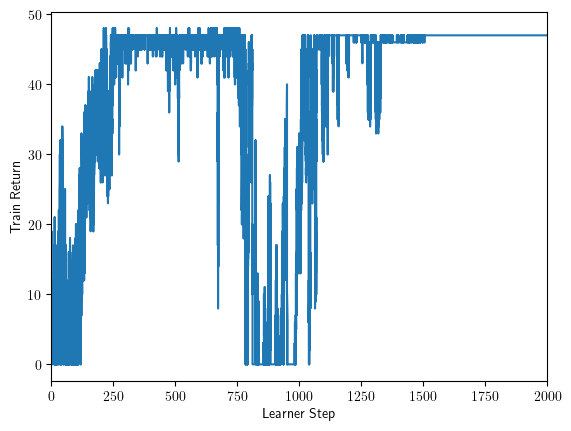

In [ ]:
fig, axes = plt.subplots()

# axes.plot(eval_arena_df["learner_steps"], eval_arena_df["eval_return/0"])
axes.plot(train_arena_df["learner_steps"], train_arena_df["train_return_per_episode/0"])

axes.set_ylabel("Train Return")
axes.set_xlabel("Learner Step")

axes.set_xlim(0, 2_000)
